In [ ]:
 #mounting drive
from google.colab import drive
drive.mount('/content/drive')



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#importing libraries for classification
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
#importing dataset
df = pd.read_csv('/content/drive/MyDrive/spambase_csv.csv')
df

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_%3B,char_freq_%28,char_freq_%5B,char_freq_%21,char_freq_%24,char_freq_%23,capital_run_length_average,capital_run_length_longest,capital_run_length_total,class
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.000,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.000,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.010,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.000,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.000,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4596,0.31,0.00,0.62,0.0,0.00,0.31,0.00,0.00,0.00,0.00,...,0.000,0.232,0.0,0.000,0.000,0.000,1.142,3,88,0
4597,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.000,0.000,0.0,0.353,0.000,0.000,1.555,4,14,0
4598,0.30,0.00,0.30,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.102,0.718,0.0,0.000,0.000,0.000,1.404,6,118,0
4599,0.96,0.00,0.00,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.000,0.057,0.0,0.000,0.000,0.000,1.147,5,78,0


In [ ]:
#performing eda
missing_values = df.isna().sum()
print(missing_values)

#dealing with missing values
# Fill numerical columns with mean
df.fillna(df.mean(), inplace=True)


word_freq_make                0
word_freq_address             0
word_freq_all                 0
word_freq_3d                  0
word_freq_our                 0
word_freq_over                0
word_freq_remove              0
word_freq_internet            0
word_freq_order               0
word_freq_mail                0
word_freq_receive             0
word_freq_will                0
word_freq_people              0
word_freq_report              0
word_freq_addresses           0
word_freq_free                0
word_freq_business            0
word_freq_email               0
word_freq_you                 0
word_freq_credit              0
word_freq_your                0
word_freq_font                0
word_freq_000                 0
word_freq_money               0
word_freq_hp                  0
word_freq_hpl                 0
word_freq_george              0
word_freq_650                 0
word_freq_lab                 0
word_freq_labs                0
word_freq_telnet              0
word_fre

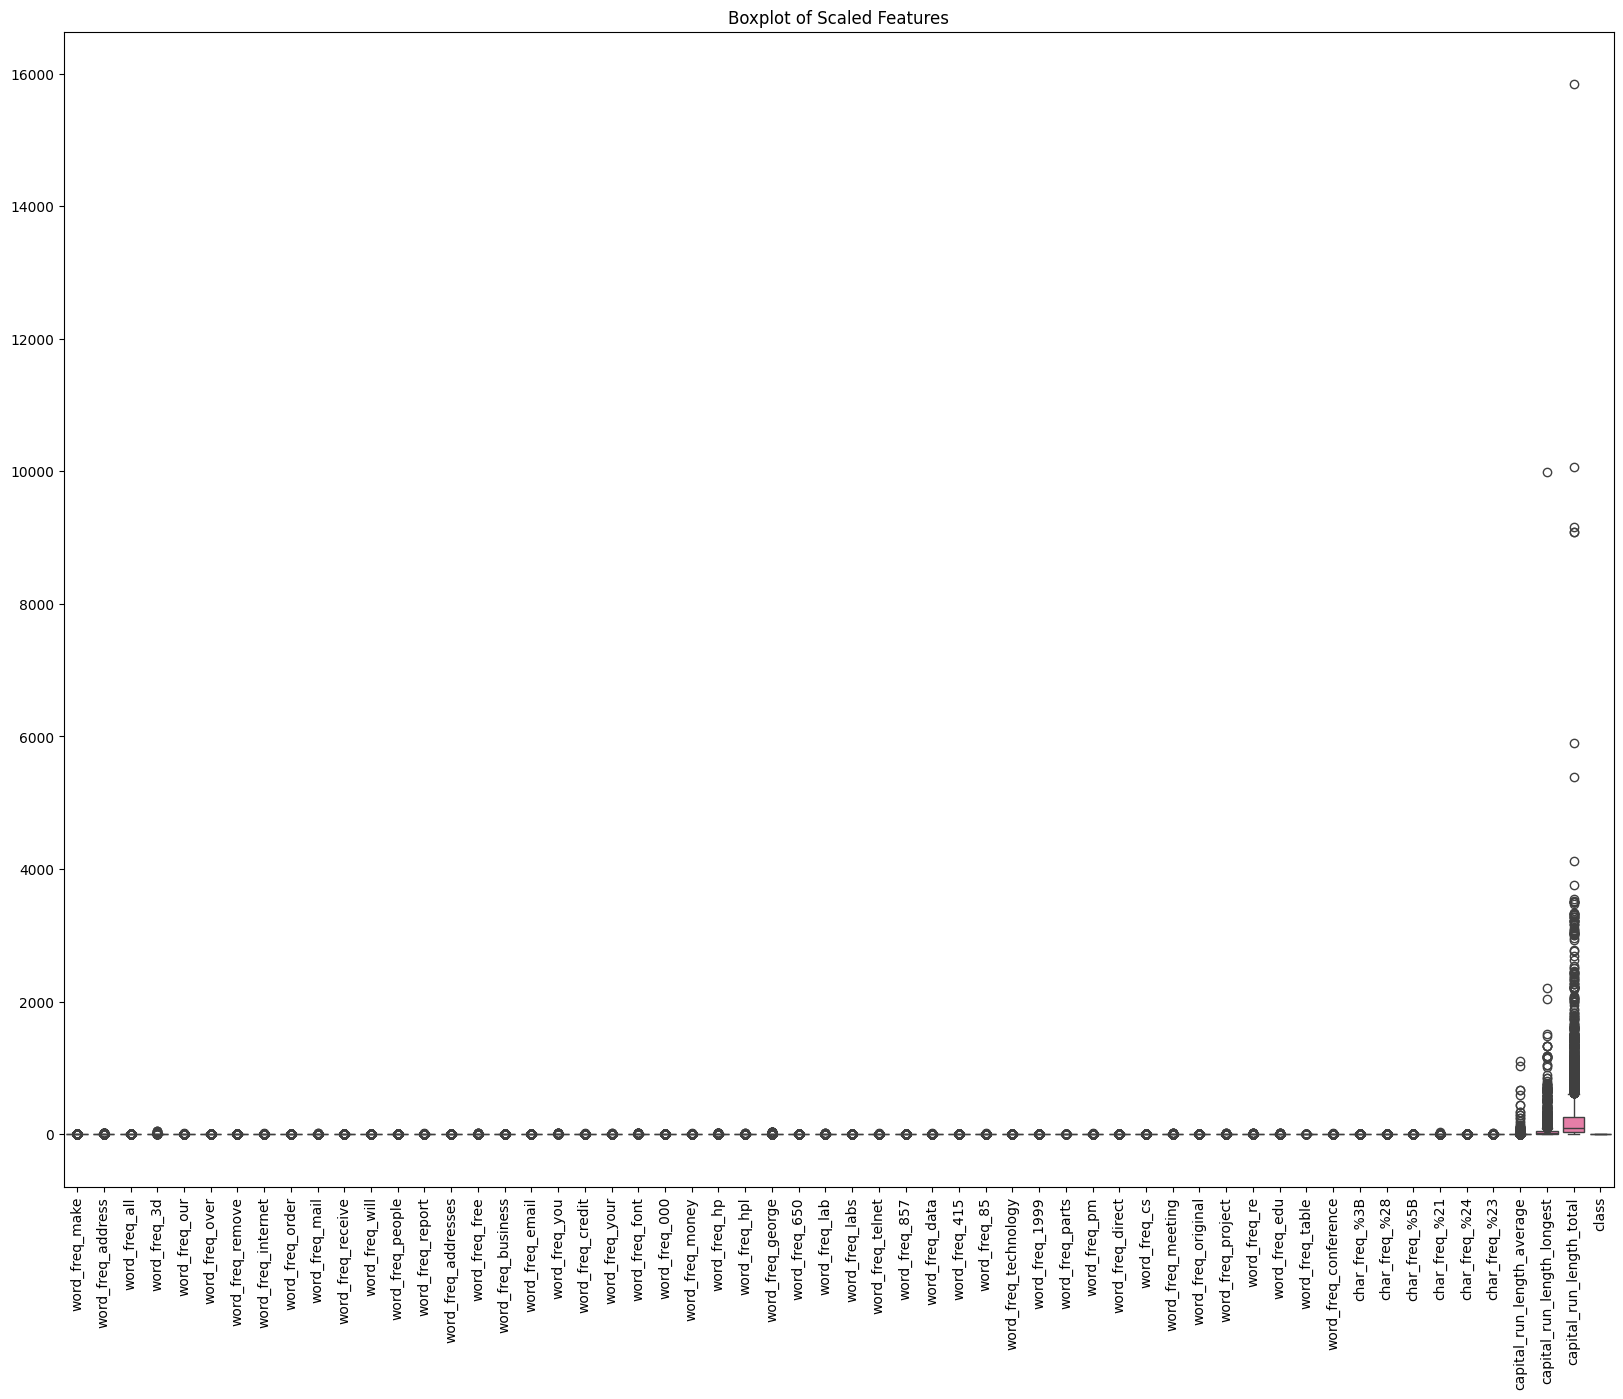


Number of outliers per column (IQR method):
word_freq_make                1053
word_freq_address              898
word_freq_all                  338
word_freq_3d                    47
word_freq_our                  501
word_freq_over                 999
word_freq_remove               807
word_freq_internet             824
word_freq_order                773
word_freq_mail                 852
word_freq_receive              709
word_freq_will                 270
word_freq_people               852
word_freq_report               357
word_freq_addresses            336
word_freq_free                 957
word_freq_business             963
word_freq_email               1038
word_freq_you                   75
word_freq_credit               424
word_freq_your                 229
word_freq_font                 117
word_freq_000                  679
word_freq_money                735
word_freq_hp                  1090
word_freq_hpl                  811
word_freq_george               780
word_freq_

In [ ]:
# Check for outliers visually using boxplots
plt.figure(figsize=(20, 15))
sns.boxplot(data=df)
plt.title('Boxplot of Scaled Features')
plt.xticks(rotation=90)
plt.show()

# Check for outliers programmatically using IQR
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

# Define outlier bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Find outliers
outliers = ((df < lower_bound) | (df > upper_bound)).sum()
print("\nNumber of outliers per column (IQR method):")
print(outliers[outliers > 0])

#removing outliers
#df = df[~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]

In [ ]:
y = df['class']
df = df.drop('class', axis=1)


In [ ]:
#using standard scaler on data for gaussianNB
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

In [ ]:
#normalise the values for gaussianNB
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df_scaled = scaler.fit_transform(df)

df

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,word_freq_conference,char_freq_%3B,char_freq_%28,char_freq_%5B,char_freq_%21,char_freq_%24,char_freq_%23,capital_run_length_average,capital_run_length_longest,capital_run_length_total
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.0,0.000,0.000,0.0,0.778,0.000,0.000,3.756,61,278
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.0,0.000,0.132,0.0,0.372,0.180,0.048,5.114,101,1028
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.0,0.010,0.143,0.0,0.276,0.184,0.010,9.821,485,2259
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.0,0.000,0.137,0.0,0.137,0.000,0.000,3.537,40,191
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.0,0.000,0.135,0.0,0.135,0.000,0.000,3.537,40,191
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4596,0.31,0.00,0.62,0.0,0.00,0.31,0.00,0.00,0.00,0.00,...,0.0,0.000,0.232,0.0,0.000,0.000,0.000,1.142,3,88
4597,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.0,0.000,0.000,0.0,0.353,0.000,0.000,1.555,4,14
4598,0.30,0.00,0.30,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.0,0.102,0.718,0.0,0.000,0.000,0.000,1.404,6,118
4599,0.96,0.00,0.00,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.0,0.000,0.057,0.0,0.000,0.000,0.000,1.147,5,78


In [ ]:
#binarize dataset from original data set for NaiveBayes Bernoulli
from sklearn.preprocessing import Binarizer

binarizer = Binarizer(threshold=0.5)
df_binarized = binarizer.fit_transform(df)

df_binarized

array([[0., 1., 1., ..., 1., 1., 1.],
       [0., 0., 0., ..., 1., 1., 1.],
       [0., 0., 1., ..., 1., 1., 1.],
       ...,
       [0., 0., 0., ..., 1., 1., 1.],
       [1., 0., 0., ..., 1., 1., 1.],
       [0., 0., 1., ..., 1., 1., 1.]])

We will be using a normalised dataset for Naive Bayes Gaussian distribution as it expects features to be normalised during fit and predict.

In [ ]:
#splitting normalised dataset and performing NaiveBayes Gaussian
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

Xg_train, Xg_test, yg_train, yg_test = train_test_split(df_scaled, y, test_size=0.2, random_state=42)

gNBmodel = GaussianNB()
gNBmodel.fit(Xg_train,yg_train)
yg_pred = gNBmodel.predict(Xg_test)


In [ ]:
#evaluating Accuracy, Precision, Recall, F1-score for GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

accuracy_g = accuracy_score(yg_test, yg_pred)
precision_g = precision_score(yg_test, yg_pred)
recall_g = recall_score(yg_test, yg_pred)
f1_g = f1_score(yg_test, yg_pred)

print("Accuracy:", accuracy_g)
print("Precision:", precision_g)
print("Recall:", recall_g)
print("F1-score:", f1_g)


Accuracy: 0.8219326818675353
Precision: 0.7233201581027668
Recall: 0.9384615384615385
F1-score: 0.8169642857142857


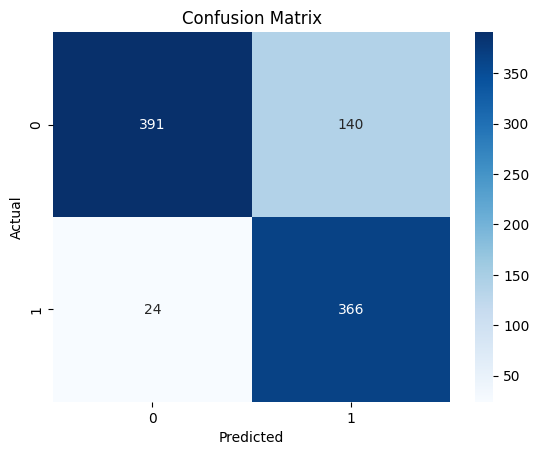

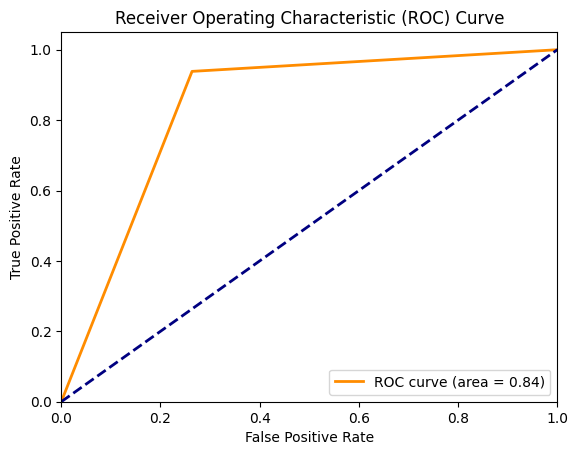

In [ ]:
#displaying confusion matrix
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
cm = confusion_matrix(yg_test, yg_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

#displaying roc curve
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(yg_test, yg_pred)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

As for NB Multinomial we will be using the original dataset as it depends on raw counts/frequency of features.

In [ ]:
#k-fold for NB gaussian
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB

gNBmodel = GaussianNB()
scores = cross_val_score(gNBmodel, df_scaled, y, cv=5)
print("Cross-validation scores:", scores)
print("Mean accuracy:", scores.mean())


Cross-validation scores: [0.85124864 0.86630435 0.85434783 0.84347826 0.69565217]
Mean accuracy: 0.8222062502950479


In [ ]:
#splitting original dataset and performing NaiveBayes Multinomial
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

Xm_train, Xm_test, ym_train, ym_test = train_test_split(df, y, test_size=0.2, random_state=42)

mNBmodel = MultinomialNB()
mNBmodel.fit(Xm_train, ym_train)
ym_pred = mNBmodel.predict(Xm_test)

accuracy_m = accuracy_score(ym_test, ym_pred)
precision_m = precision_score(ym_test, ym_pred)
recall_m = recall_score(ym_test, ym_pred)
f1_m = f1_score(ym_test, ym_pred)

print("Accuracy:", accuracy_g)
print("Precision:", precision_g)
print("Recall:", recall_g)
print("F1-score:", f1_g)


Accuracy: 0.8219326818675353
Precision: 0.7233201581027668
Recall: 0.9384615384615385
F1-score: 0.8169642857142857


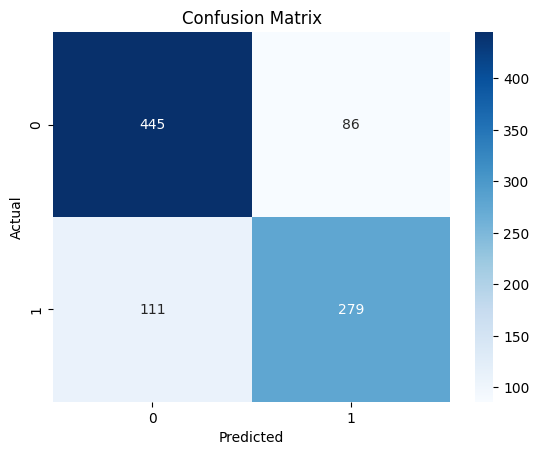

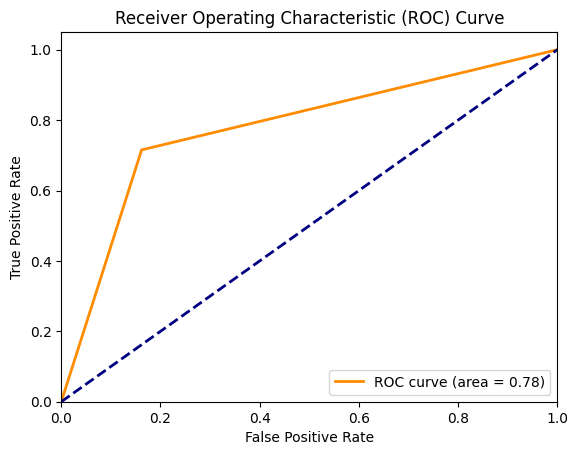

In [ ]:
#displaying confusion matrix
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
cm = confusion_matrix(ym_test, ym_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

#displaying roc curve
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(ym_test, ym_pred)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

In [ ]:
#k-fold for NB multinomial
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import MultinomialNB

mNBmodel = MultinomialNB()
scores = cross_val_score(mNBmodel, df, y, cv=5)
print("Cross-validation scores:", scores)
print("Mean accuracy:", scores.mean())

Cross-validation scores: [0.79261672 0.81847826 0.81521739 0.78586957 0.69673913]
Mean accuracy: 0.7817842137563139


For NB bernoulli we will use Binariser to convert the data to binary

In [ ]:
#train test split and NB Bernoulli with binarised data
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import accuracy_score

Xb_train, Xb_test, yb_train, yb_test = train_test_split(df_binarized, y, test_size=0.2, random_state=42)

bNBmodel = BernoulliNB()
bNBmodel.fit(Xb_train, yb_train)
yb_pred = bNBmodel.predict(Xb_test)

accuracy_b = accuracy_score(yb_test, yb_pred)
precision_b = precision_score(yb_test, yb_pred)
recall_b = recall_score(yb_test, yb_pred)
f1_b = f1_score(yb_test, yb_pred)

print("Accuracy:", accuracy_b)
print("Precision:", precision_b)
print("Recall:", recall_b)
print("F1-score:", f1_b)


Accuracy: 0.8957654723127035
Precision: 0.8712121212121212
Recall: 0.8846153846153846
F1-score: 0.8778625954198473


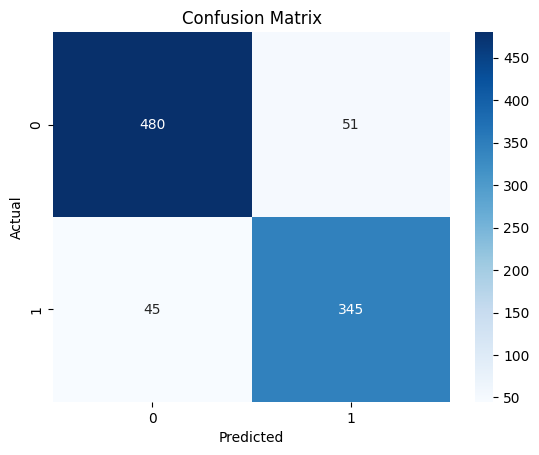

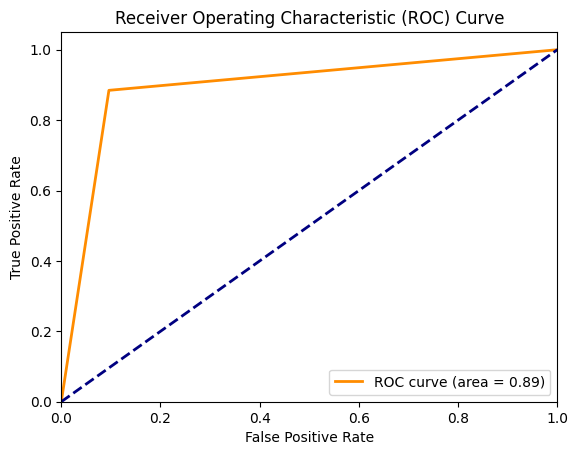

In [ ]:
#displaying confusion matrix
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
cm = confusion_matrix(yb_test, yb_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

#displaying roc curve
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(yb_test, yb_pred)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

In [ ]:
#applying K-fold Cross validation for NB bernoulli
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import BernoulliNB

bNBmodel = BernoulliNB()
scores = cross_val_score(bNBmodel, df_binarized, y, cv=5)
print("Cross-validation scores:", scores)
print("Mean accuracy:", scores.mean())



Cross-validation scores: [0.90662324 0.91086957 0.92391304 0.93695652 0.74456522]
Mean accuracy: 0.8845855166879101
